In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('netflix_content_2023.csv')

In [6]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [8]:
df.shape

(24812, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


## Data Cleaning

In [13]:
## Change the data types of Release date and hours viewed

df['Hours Viewed'] = df['Hours Viewed'].replace(',','',regex = True).astype(float)

In [15]:
df.head(1)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show


In [17]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.1+ MB


In [21]:
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

In [25]:
content_type_viewership = (df.groupby('Content Type')['Hours Viewed'].sum().reset_index().assign(Billions_Viewed=lambda x: x['Hours Viewed'] / 1e9)) # Divide by 1 billion

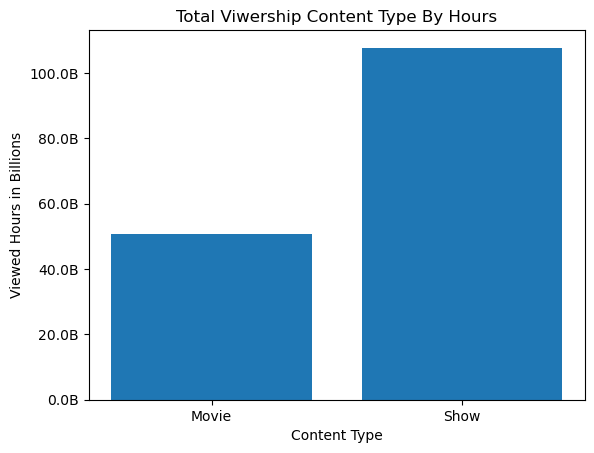

,Content Type,Hours Viewed,Billions_Viewed
0,Movie,5.063780e+10,50.6378
1,Show,1.077641e+11,107.7641


In [27]:
from matplotlib.ticker import FuncFormatter

# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

plt.bar(x= content_type_viewership['Content Type'],height= content_type_viewership['Hours Viewed'])
plt.xlabel('Content Type')
plt.ylabel('Viewed Hours in Billions')
plt.title('Total Viwership Content Type By Hours')

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))
plt.show()
content_type_viewership

The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

In [30]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

In [32]:
language_viewership = (df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False).reset_index().assign(billions_viewed = lambda x : x['Hours Viewed']/1e9))

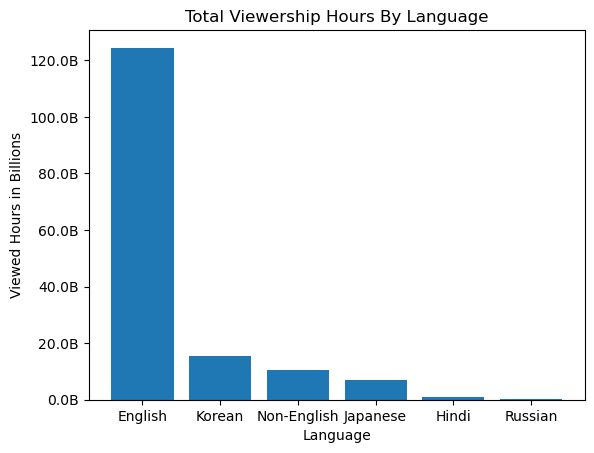

,Language Indicator,Hours Viewed,billions_viewed
0,English,1.244417e+11,124.4417
1,Korean,1.537840e+10,15.3784
2,Non-English,1.043910e+10,10.4391
3,Japanese,7.102000e+09,7.1020
4,Hindi,9.261000e+08,0.9261
5,Russian,1.146000e+08,0.1146


In [34]:
# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

plt.bar(x = language_viewership['Language Indicator'], height = language_viewership['Hours Viewed'])
plt.xlabel("Language")
plt.ylabel("Viewed Hours in Billions")
plt.title('Total Viewership Hours By Language')

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))
plt.show()
language_viewership

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

In [37]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show


In [39]:
df['Release Month'] = df['Release Date'].dt.month_name()

In [41]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,March
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,January


In [43]:
monthly_viewership_by_hours = (df.groupby('Release Month')['Hours Viewed'].sum().reset_index().sort_values(ascending=False, by='Hours Viewed').assign(Billions_viewed = lambda x: x['Hours Viewed']/1e9))

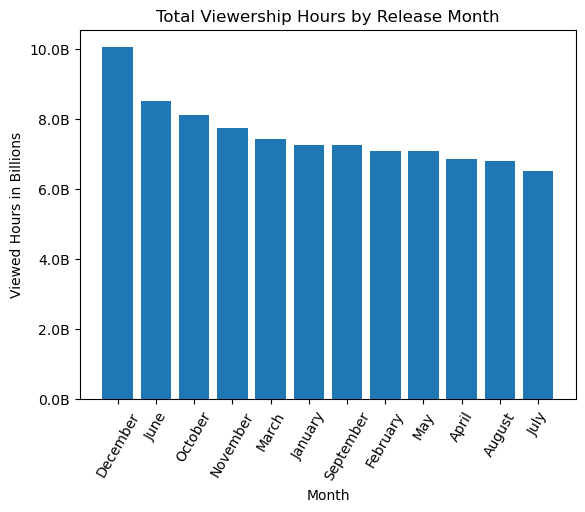

,Release Month,Hours Viewed,Billions_viewed
2,December,1.005580e+10,10.0558
6,June,8.522000e+09,8.5220
10,October,8.123200e+09,8.1232
9,November,7.749500e+09,7.7495
7,March,7.437100e+09,7.4371
4,January,7.271600e+09,7.2716
11,September,7.262200e+09,7.2622
3,February,7.103700e+09,7.1037
8,May,7.094600e+09,7.0946
0,April,6.865700e+09,6.8657


In [45]:
# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

plt.bar(x = monthly_viewership_by_hours['Release Month'], height = monthly_viewership_by_hours['Hours Viewed'])
plt.xlabel('Month')
plt.ylabel('Viewed Hours in Billions')
plt.title('Total Viewership Hours by Release Month')
plt.xticks(rotation = 60)

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))
plt.show()
monthly_viewership_by_hours

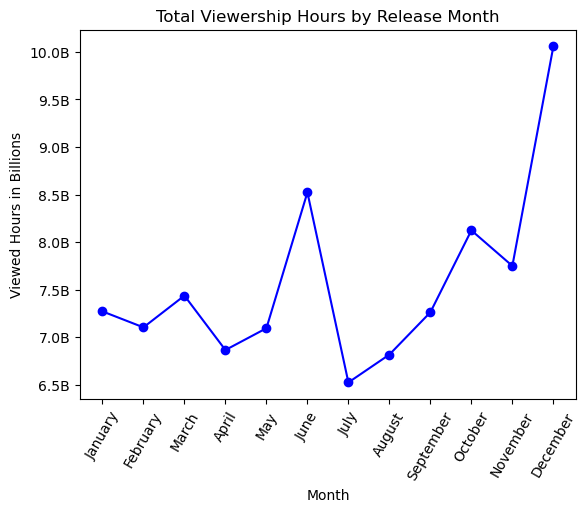

,Release Month,Hours Viewed,Billions_viewed
4,January,7.271600e+09,7.2716
3,February,7.103700e+09,7.1037
7,March,7.437100e+09,7.4371
0,April,6.865700e+09,6.8657
8,May,7.094600e+09,7.0946
6,June,8.522000e+09,8.5220
5,July,6.524800e+09,6.5248
1,August,6.817800e+09,6.8178
11,September,7.262200e+09,7.2622
10,October,8.123200e+09,8.1232


In [47]:
# Ensure the months are ordered from January to December
monthly_viewership_by_hours['Release Month'] = pd.Categorical(
    monthly_viewership_by_hours['Release Month'], 
    categories=[
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    ordered=True
)

# Sort the DataFrame by the ordered Release Month
monthly_viewership_by_hours = monthly_viewership_by_hours.sort_values('Release Month')

# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

# Plot the line chart
plt.plot(monthly_viewership_by_hours['Release Month'], 
         monthly_viewership_by_hours['Hours Viewed'], 
         marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Viewed Hours in Billions')
plt.title('Total Viewership Hours by Release Month')

# Rotate x-axis labels
plt.xticks(rotation=60)

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))

# Show the plot
plt.show()

# Display the DataFrame
monthly_viewership_by_hours



The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

In [50]:
top_5_titles = df.nlargest(5,'Hours Viewed')
top_5_titles

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,March
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,January
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,June
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,December
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,August


The top 5 most-viewed titles on Netflix in 2023 are:

    The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.
    Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.
    King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.
    The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.
    ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.


In [70]:
monthly_viewership_by_content = df.pivot_table(index = 'Release Month', columns='Content Type', values = 'Hours Viewed', aggfunc='sum')

In [90]:
monthly_viewership_by_content

Content Type,Movie,Show
Release Month,,
April,2.757600e+09,4.108100e+09
August,2.186400e+09,4.631400e+09
December,2.554900e+09,7.500900e+09
February,1.654400e+09,5.449300e+09
January,2.275900e+09,4.995700e+09
July,1.615700e+09,4.909100e+09
June,3.135800e+09,5.386200e+09
March,2.109400e+09,5.327700e+09
May,2.520500e+09,4.574100e+09


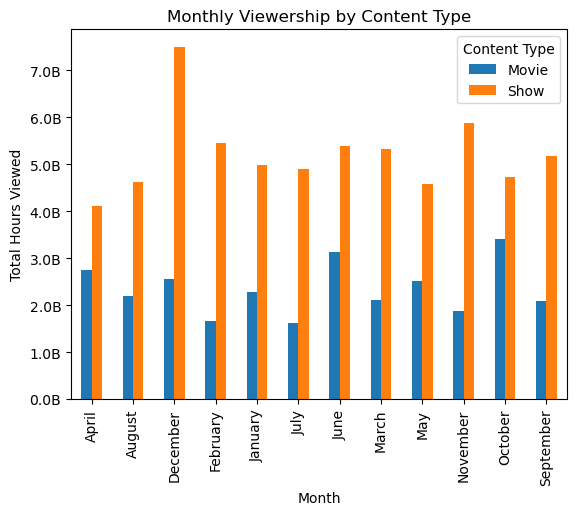

In [106]:
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

monthly_viewership_by_content.plot(kind='bar')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed')
plt.title('Monthly Viewership by Content Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Content Type')

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))

plt.show()

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

In [109]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,March
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,January
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,December
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,November
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,May


In [127]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

In [131]:
df['Season'] = df['Release Month'].apply(get_season)

In [133]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,March,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,January,Winter
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,December,Winter
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,November,Fall
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,May,Spring


In [145]:
viewership_by_season = (df.groupby('Season')['Hours Viewed'].sum().reset_index().assign(billion_viewed = lambda x: x['Hours Viewed'] / 1e9))

In [147]:
viewership_by_season

,Season,Hours Viewed,billion_viewed
0,Fall,9.070880e+10,90.7088
1,Spring,2.139740e+10,21.3974
2,Summer,2.186460e+10,21.8646
3,Winter,2.443110e+10,24.4311


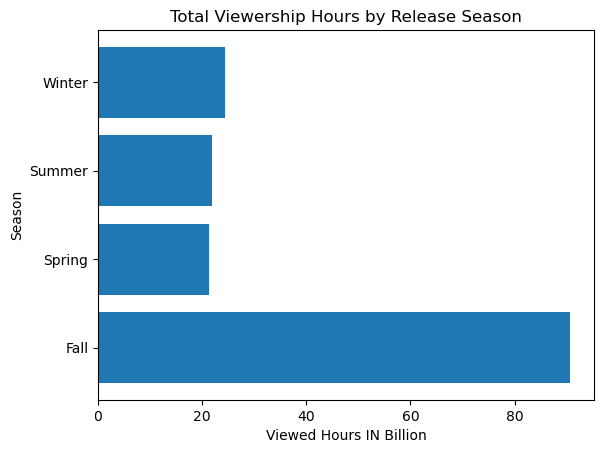

In [151]:
plt.barh(y = viewership_by_season['Season'], width = viewership_by_season['billion_viewed'])
plt.xlabel('Viewed Hours IN Billion')
plt.ylabel('Season')
plt.title('Total Viewership Hours by Release Season')
plt.show()

The graph indicates that viewership hours peak significantly in the Fall season, with 90 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

In [156]:
df['Release Month'].value_counts().sort_index()

April        647
August       674
December     787
February     560
January      608
July         631
June         670
March        690
May          624
November     734
October      802
September    739
Name: Release Month, dtype: int64

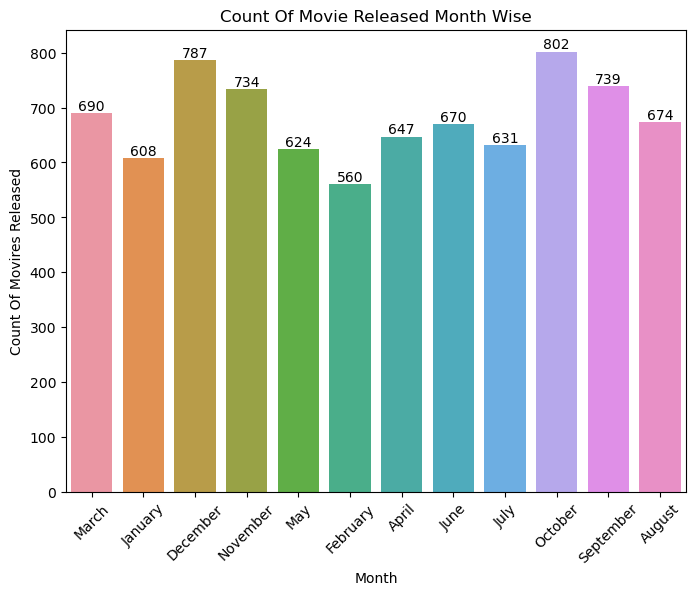

In [179]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df, x = 'Release Month')
ax.bar_label(ax.containers[0])
plt.xlabel('Month')
plt.ylabel('Count Of Movires Released')
plt.title('Count Of Movie Released Month Wise')
plt.xticks(rotation=45)
plt.show()

In [183]:
df['Release Day'] = df['Release Date'].dt.day_name()

In [239]:
weekday_viewership = df.groupby('Release Day')['Hours Viewed'].sum().reset_index()

In [241]:
weekday_viewership

,Release Day,Hours Viewed
0,Friday,3.821720e+10
1,Monday,3.954500e+09
2,Saturday,5.121800e+09
3,Sunday,1.935300e+09
4,Thursday,2.029280e+10
5,Tuesday,5.562300e+09
6,Wednesday,1.574410e+10


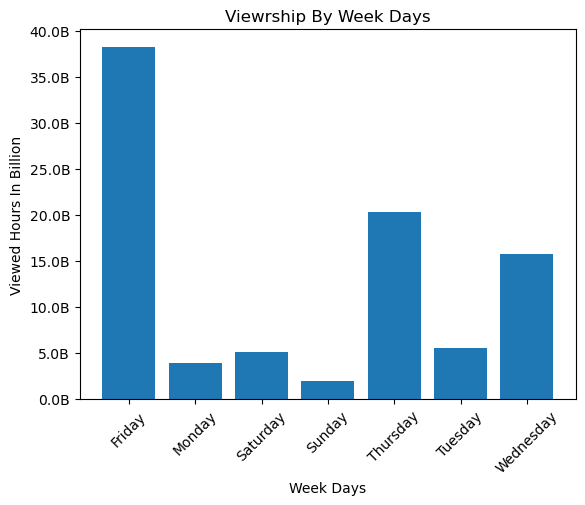

In [259]:
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

plt.bar(x = weekday_viewership['Release Day'], height = weekday_viewership['Hours Viewed'])
plt.xlabel('Week Days')
plt.ylabel('Viewed Hours In Billion')
plt.title('Viewrship By Week Days')
plt.xticks(rotation=45)

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))

plt.show()

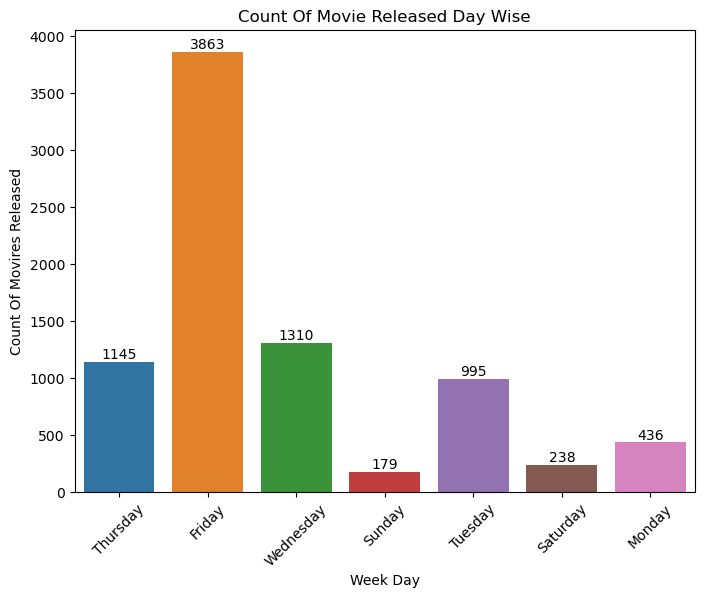

In [268]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df, x = 'Release Day')
ax.bar_label(ax.containers[0])
plt.xlabel('Week Day')
plt.ylabel('Count Of Movires Released')
plt.title('Count Of Movie Released Day Wise')
plt.xticks(rotation=45)
plt.show()

## Ask ChatGPT To do following 
To show the relationship between weekdays, the count of movie releases on those weekdays, and hours viewed

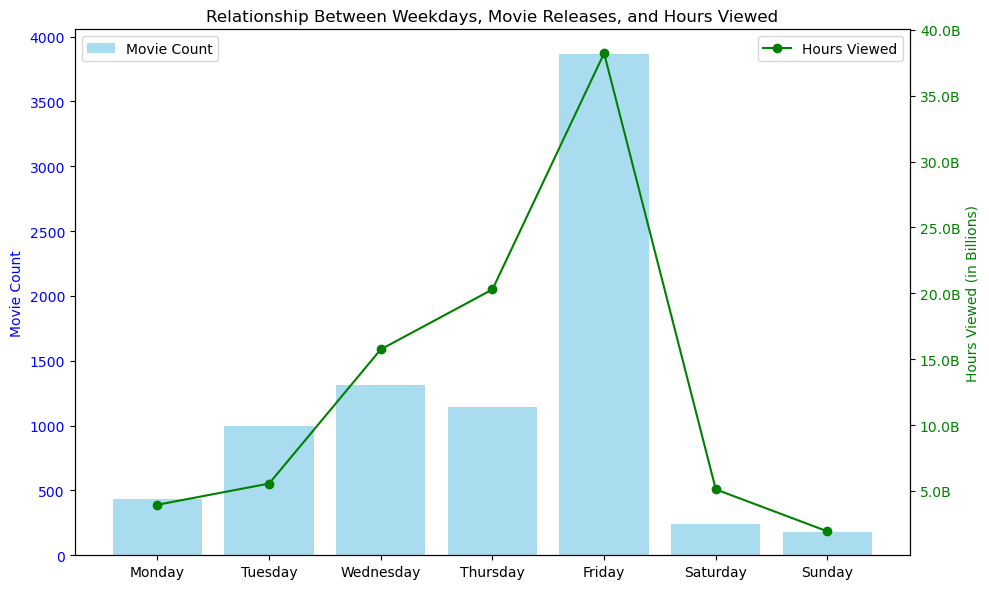

In [261]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Extract the day of the week from 'Release Date'
df['Weekday'] = df['Release Date'].dt.day_name()

# Aggregate data
weekday_data = df.groupby('Weekday').agg(
    Movie_Count=('Release Date', 'count'),
    Total_Hours_Viewed=('Hours Viewed', 'sum')
).reset_index()

# Ensure weekdays are ordered correctly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data['Weekday'] = pd.Categorical(weekday_data['Weekday'], categories=weekday_order, ordered=True)
weekday_data = weekday_data.sort_values('Weekday')

# Plot grouped bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Movie_Count
ax1.bar(weekday_data['Weekday'], weekday_data['Movie_Count'], color='skyblue', label='Movie Count', alpha=0.7)
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for Total_Hours_Viewed
ax2 = ax1.twinx()
ax2.plot(weekday_data['Weekday'], weekday_data['Total_Hours_Viewed'], color='green', marker='o', label='Hours Viewed')
ax2.set_ylabel('Hours Viewed (in Billions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

ax2.yaxis.set_major_formatter(FuncFormatter(format_amount))

# Add title and legend
plt.title('Relationship Between Weekdays, Movie Releases, and Hours Viewed')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

## Conclusion

So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.